# Calling modules and setting

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import shapiro
from sklearn import linear_model
from scipy.stats import norm
import statsmodels.api as sm

pd.set_option('max_columns',1000,'max_rows',1000)

# Importing data

In [126]:
train_data = pd.read_csv('pre_processed_train_data.csv')
test_data = pd.read_csv('pre_processed_test_data.csv')
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,4,65.0,8450,1,1,3,3,2,4,0,5,2,2,0,5,7,5,2003,2003,1,1,13,14,1,196.0,3,2,2,2,3,1,6,706.0,1,0.0,150.0,856.0,1,5,1,5,856,854,0,1710,1.0,0.0,2,1,3,1,3,8,7,0,0,1,2003,2,2.0,548.0,3,3,2,0,61,0,0,0,0,0,0,1,0,2,2008,9,4,208500
1,20,4,80.0,9600,1,1,3,3,2,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,2,2,1,2,3,4,5,978.0,1,0.0,284.0,1262.0,1,5,1,5,1262,0,0,1262,0.0,1.0,2,0,3,1,2,6,7,1,3,1,1976,2,2.0,460.0,3,3,2,298,0,0,0,0,0,0,0,1,0,5,2007,9,4,181500
2,60,4,68.0,11250,1,1,0,3,2,4,0,5,2,2,0,5,7,5,2001,2002,1,1,13,14,1,162.0,3,2,2,2,3,2,6,486.0,1,0.0,434.0,920.0,1,5,1,5,920,866,0,1786,1.0,0.0,2,1,3,1,3,6,7,1,3,1,2001,2,2.0,608.0,3,3,2,0,42,0,0,0,0,0,0,1,0,9,2008,9,4,223500
3,70,4,60.0,9550,1,1,0,3,2,0,0,6,2,2,0,5,7,5,1915,1970,1,1,14,16,2,0.0,2,2,0,3,4,1,5,216.0,1,0.0,540.0,756.0,1,3,1,5,961,756,0,1717,1.0,0.0,1,0,3,1,3,7,7,1,4,5,1998,1,3.0,642.0,3,3,2,0,35,272,0,0,0,0,0,1,0,2,2006,9,0,140000
4,60,4,84.0,14260,1,1,0,3,2,2,0,15,2,2,0,5,8,5,2000,2000,1,1,13,14,1,350.0,3,2,2,2,3,3,6,655.0,1,0.0,490.0,1145.0,1,5,1,5,1145,1053,0,2198,1.0,0.0,2,1,4,1,3,9,7,1,3,1,2000,2,3.0,836.0,3,3,2,192,84,0,0,0,0,0,0,1,0,12,2008,9,4,250000


# Converting data type
- preference, score, date → string

In [127]:
numerical_set = {'1stFlrSF', '2ndFlrSF', '3SsnPorch', 'EnclosedPorch', 'GrLivArea', 'LotArea', 'LowQualFinSF', 'MiscVal', 'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'GarageArea', 'LotFrontage', 'MasVnrArea', 'TotalBsmtSF', 'WoodDeckSF'}
counting_set = {'BedroomAbvGr', 'Fireplaces', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars'}
preference_set = {'MSSubClass', 'Alley', 'BldgType', 'CentralAir', 'Condition1', 'Condition2', 'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType', 'Heating', 'HouseStyle', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street'}
score_set = {'OverallCond', 'OverallQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'ExterCond', 'ExterQual', 'Fence', 'FireplaceQu', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'HeatingQC', 'KitchenQual', 'PavedDrive', 'PoolQC', 'Utilities'}
date_set = {'MoSold', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'}

train_data[list(preference_set)] = train_data[list(preference_set)].astype(int).astype(str)
train_data[list(score_set)] = train_data[list(score_set)].astype(int).astype(str)
train_data[list(date_set)] = train_data[list(date_set)].astype(int).astype(str)

# Plotting with simple regression line
- numerical variables

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


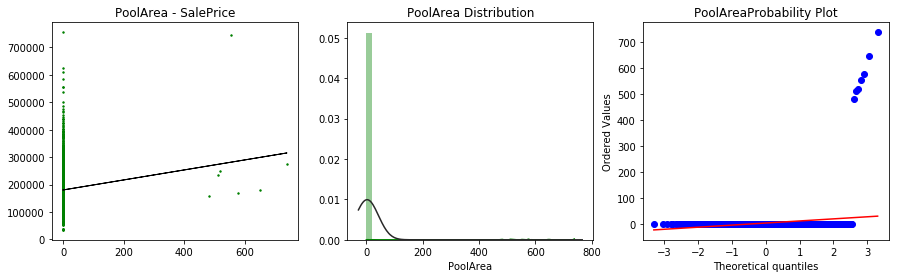

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


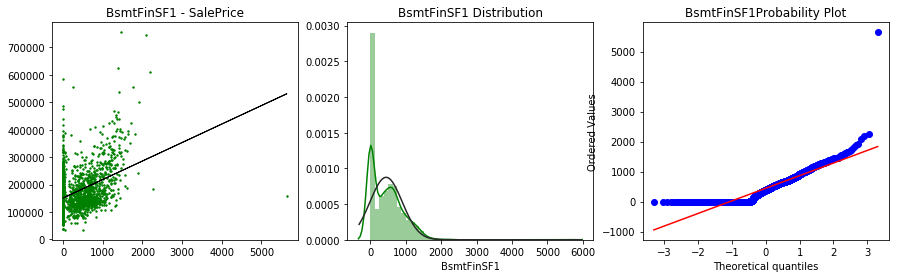

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


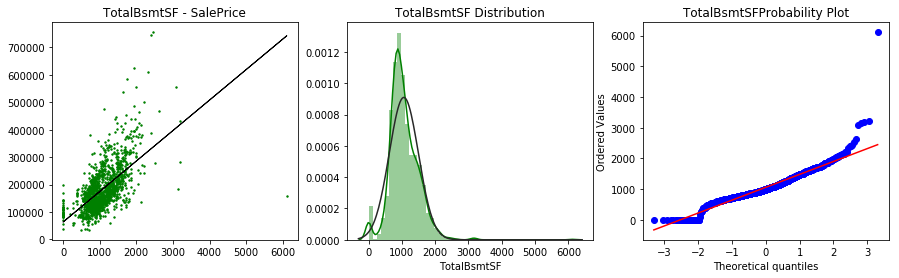

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


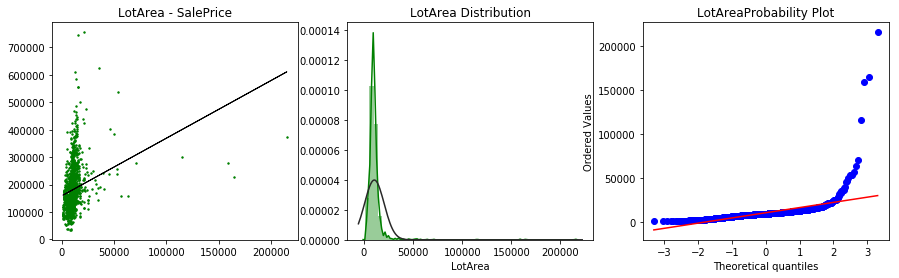

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


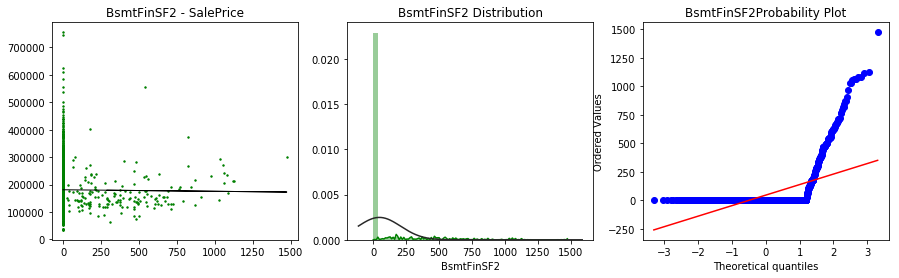

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


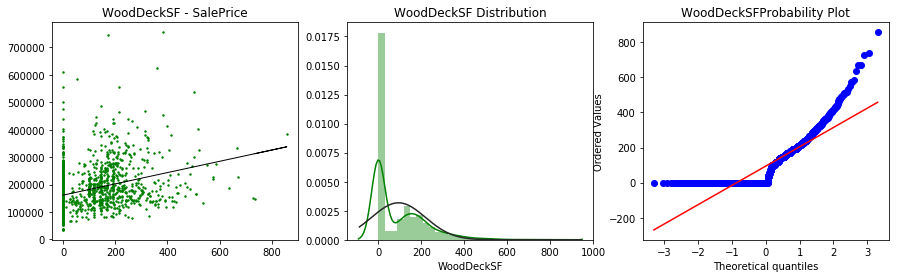

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


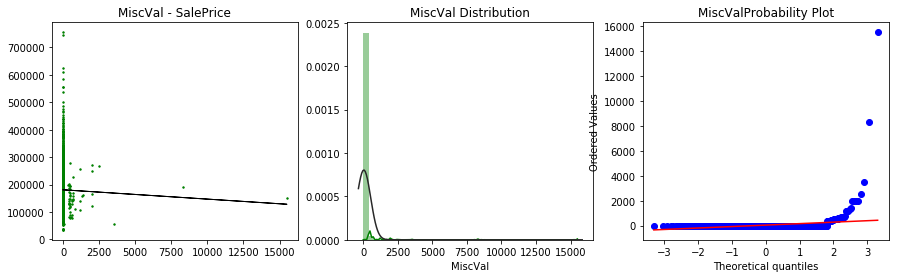

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


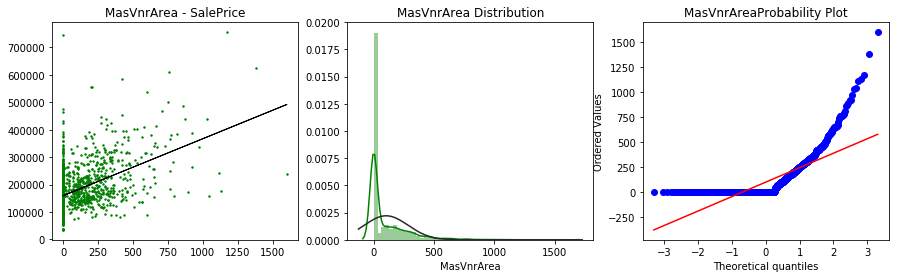

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


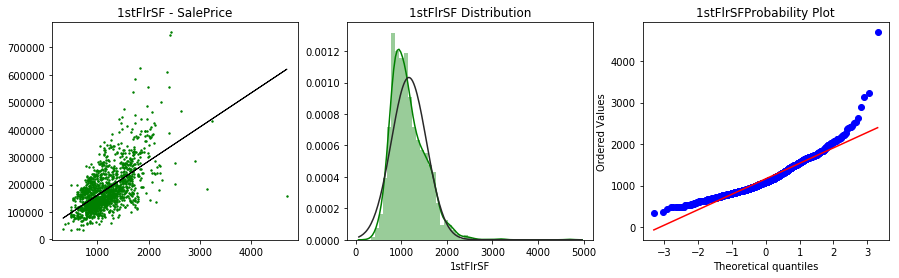

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


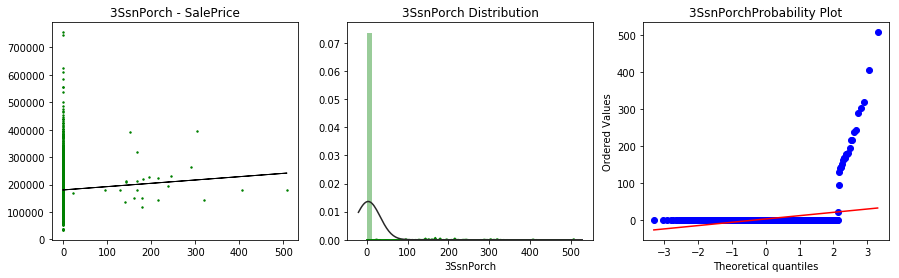

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


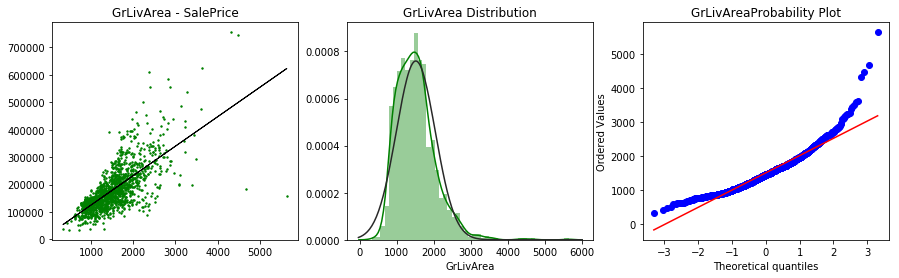

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


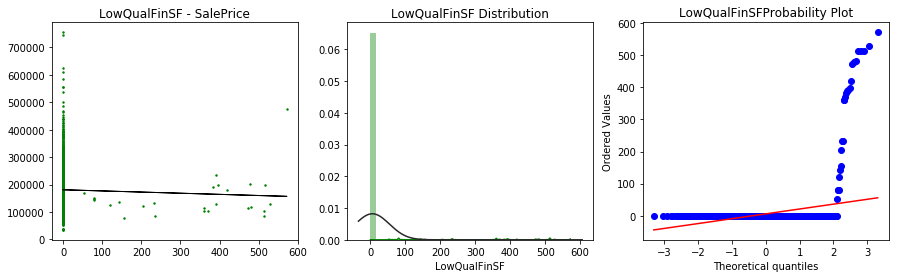

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


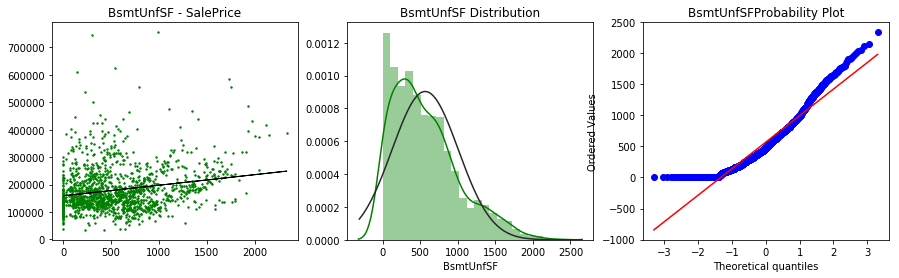

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


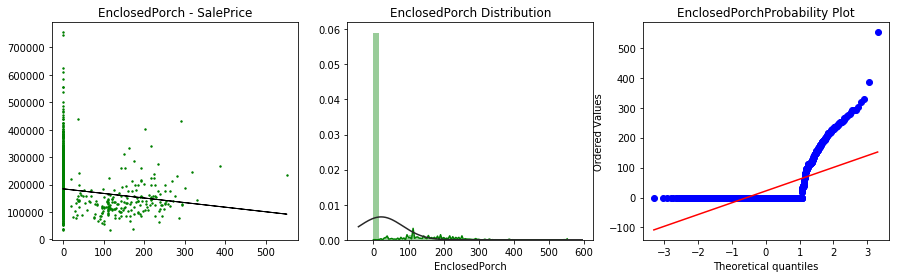

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


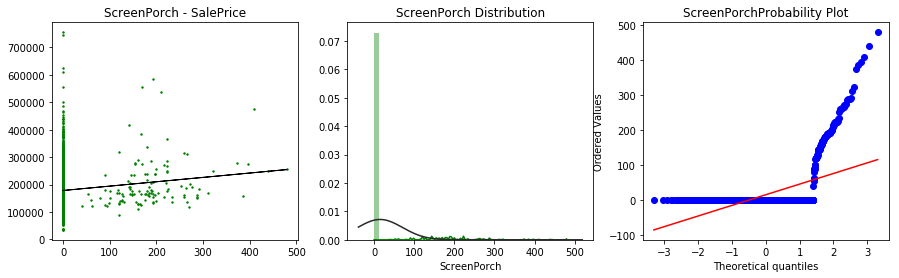

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


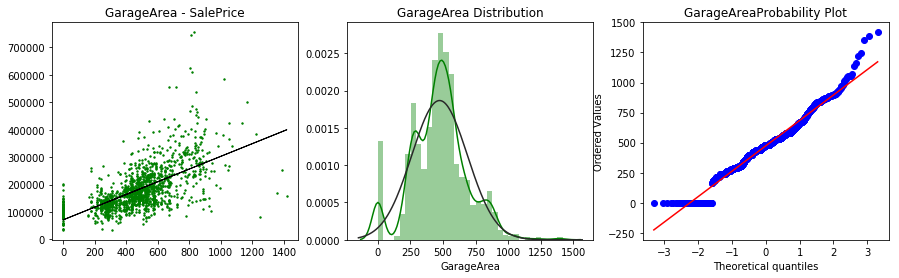

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


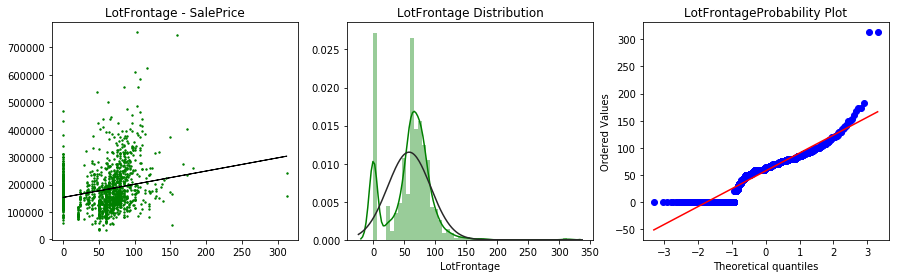

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


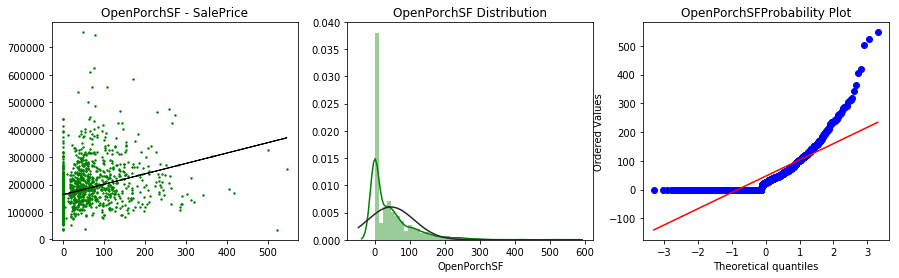

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


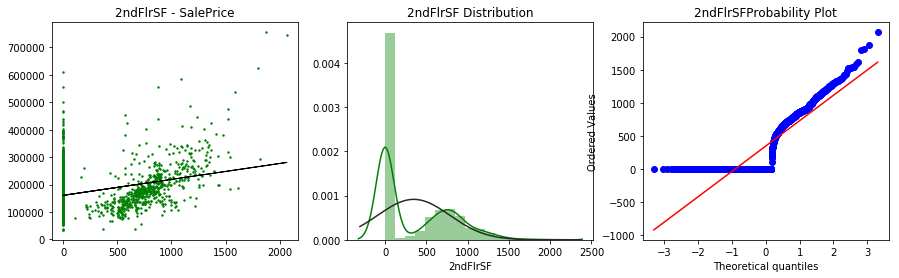

In [141]:
ols = linear_model.LinearRegression()

for i in list(numerical_set):
    X = train_data[i].values.reshape(-1,1)
    Y = train_data['SalePrice']
    ols.fit(X, Y)
    
    fig = plt.figure(figsize=(15,4))
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)
    
    ax1.scatter(train_data[i], train_data['SalePrice'], s = 2, c = 'green')
    ax1.plot(X, X * ols.coef_ + ols.intercept_, color = 'black', linewidth = 1)
    
    sns.distplot(train_data[i], fit = norm, color = 'green', ax = ax2)
    
    stats.probplot(train_data[i], plot = ax3)
    
    ax1.set_title(str(i) + ' - SalePrice')
    ax2.set_title(str(i) + ' Distribution')
    ax3.set_title(str(i) + 'Probability Plot')
    
    plt.show()

In [ ]:
sm.qqplot(test, line='45')
stats.probplot(train_data[i], s = 2, plot = ax3)